In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('Trainfile.csv')
test = pd.read_csv('Testfile.csv')

In [3]:
train = train.filter(['LotShape','LotArea','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinSF1','LowQualFinSF','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','BedroomAbvGr','TotRmsAbvGrd','FullBath','GarageYrBlt','GarageArea','ScreenPorch','KitchenAbvGr','KitchenQual', 'EnclosedPorch','MoSold','SaleType','YrSold', 'SalePrice'])
test = test.filter(['LotShape','LotArea','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinSF1','LowQualFinSF','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','BedroomAbvGr','TotRmsAbvGrd','FullBath','GarageYrBlt','GarageArea','ScreenPorch','KitchenAbvGr','KitchenQual','EnclosedPorch','MoSold','SaleType','YrSold', 'SalePrice'])
train.head()

,LotShape,LotArea,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,LowQualFinSF,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageArea,ScreenPorch,KitchenAbvGr,KitchenQual,EnclosedPorch,MoSold,SaleType,YrSold,SalePrice
0,Reg,7227,TA,No,Unf,0,0,Unf,0,832,...,1962.0,528,0,1,Gd,0,6,WD,2008,105500
1,IR1,12227,Gd,No,ALQ,896,0,Unf,0,434,...,1977.0,619,0,1,TA,0,7,WD,2008,272000
2,Reg,7800,TA,No,ALQ,450,0,Unf,0,414,...,1967.0,288,0,1,Gd,0,6,WD,2009,130000
3,IR1,12665,Gd,Gd,Unf,0,0,Unf,0,1094,...,2005.0,642,0,1,Gd,0,2,WD,2007,281213
4,Reg,15431,Ex,Gd,GLQ,1767,0,ALQ,539,788,...,2008.0,672,170,1,Ex,0,4,WD,2009,555000


In [4]:
#Converting categorical data to numerical
for col_name in train.columns:
    if(train[col_name].dtype == 'object'):
        train[col_name]= train[col_name].astype('category')
        train[col_name] = train[col_name].cat.codes
for col_name in test.columns:
    if(test[col_name].dtype == 'object'):
        test[col_name]= test[col_name].astype('category')
        test[col_name] = test[col_name].cat.codes
train.head()

,LotShape,LotArea,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,LowQualFinSF,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageArea,ScreenPorch,KitchenAbvGr,KitchenQual,EnclosedPorch,MoSold,SaleType,YrSold,SalePrice
0,3,7227,3,3,5,0,0,5,0,832,...,1962.0,528,0,1,2,0,6,7,2008,105500
1,0,12227,2,3,0,896,0,5,0,434,...,1977.0,619,0,1,3,0,7,7,2008,272000
2,3,7800,3,3,0,450,0,5,0,414,...,1967.0,288,0,1,2,0,6,7,2009,130000
3,0,12665,2,1,5,0,0,5,0,1094,...,2005.0,642,0,1,2,0,2,7,2007,281213
4,3,15431,0,1,2,1767,0,0,539,788,...,2008.0,672,170,1,0,0,4,7,2009,555000


In [5]:
train = train.replace(-1, np.nan)
test = test.replace(-1, np.nan)

In [6]:
#filling out missing data
trainMean = train.describe().loc['mean']
testStd = test.describe().loc['std']
testMean = test.describe().loc['mean']
for i in range(len(train.columns)):
    train.iloc[:, i] = train.iloc[:, i].fillna(trainMean[i])
    test.iloc[:, i] = test.iloc[:, i].fillna(testMean[i])

In [7]:
#Feature Scaling
train=(train-train.mean())/train.std()
test=(test-test.mean())/test.std()
train.head()

,LotShape,LotArea,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,LowQualFinSF,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageArea,ScreenPorch,KitchenAbvGr,KitchenQual,EnclosedPorch,MoSold,SaleType,YrSold,SalePrice
0,0.743227,-0.393466,0.850790,0.649106,1.258968,-0.973404,-0.122993,0.307036,-0.276574,0.608600,...,-0.698623,0.264859,-0.269849,-0.223245,-0.407618,-0.367372,-0.121984,0.323837,0.115245,-0.963285
1,-1.387233,0.252298,-0.329029,0.649106,-1.488051,1.006428,-0.122993,0.307036,-0.276574,-0.290040,...,-0.065519,0.682629,-0.269849,-0.223245,0.791010,-0.367372,0.245260,0.323837,0.115245,1.209134
2,0.743227,-0.319461,0.850790,0.649106,-1.488051,0.020931,-0.122993,0.307036,-0.276574,-0.335197,...,-0.487588,-0.836953,-0.269849,-0.223245,-0.407618,-0.367372,-0.121984,0.323837,0.868971,-0.643619
3,-1.387233,0.308867,-0.329029,-1.105620,1.258968,-0.973404,-0.122993,0.307036,-0.276574,1.200167,...,1.116273,0.788220,-0.269849,-0.223245,-0.407618,-0.367372,-1.590962,0.323837,-0.638482,1.329341
4,0.743227,0.666104,-2.688668,-1.105620,-0.389244,2.931018,-0.122993,-5.139906,3.193939,0.509253,...,1.242894,0.925946,2.878633,-0.223245,-2.804872,-0.367372,-0.856473,0.323837,0.868971,4.901594


In [8]:
train = train.replace(-1, np.nan)
test= test.replace(-1, np.nan)

In [9]:
#Model being created
X = train.iloc[:,0:-1]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
y = train.iloc[:,25:26].values

theta = np.zeros([1,26])
thetaT = theta.T


alpha = 0.01
iters = 500


In [10]:
m = X @ thetaT - y

(1138, 26)
(1138, 1)
(1, 26)
(1138, 1)


1138

In [11]:
#Cost Function
def calc_cost(X, y, theta):
    err = np.power(((X @ theta.T) - y),2)
    return np.sum(err)/(2 * len(X))
it = 1000
#Gradient Descent
def grad_descent(X, y, theta, alpha, it):
    cost = np.zeros(it)
    for i in range(it):
        theta = theta - (alpha/len(X))*np.sum(X * (X @ theta.T - y), axis = 0)
        cost[i] = calc_cost(X, y, theta)

    return theta, cost

In [12]:
feat, cost = grad_descent(X, y, theta, alpha, it)
print(feat)
fin_cost = calc_cost(X, y, feat)
print(fin_cost)

[[ 6.58660785e-16 -2.72044117e-02  3.72895928e-02 -1.56003077e-01
  -6.50768532e-02 -6.13891745e-02  6.19659335e-02 -1.43344792e-02
   3.85724596e-03  2.44912588e-02  3.80070192e-02  1.11090660e-01
   1.76076402e-01  2.47160001e-01 -6.03987171e-02  1.54615027e-01
   9.43574116e-02  4.36103813e-02  1.50550709e-01  5.98350631e-02
  -1.43457568e-01 -1.60058859e-01 -1.61126541e-02  3.43810622e-02
   1.17633163e-02 -4.05869982e-03]]
0.11278445675909046


Text(0.5, 1.0, 'Iterations vs Cost')

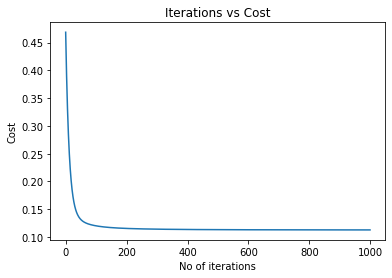

In [13]:
plt.figure()
plt.plot(np.arange(1000), cost)
plt.xlabel('No of iterations')
plt.ylabel('Cost')
plt.title('Iterations vs Cost')

In [14]:
X1 = test.iloc[:, :-1]
y1 = test['SalePrice']
y1 = y1.values.reshape(len(y1), 1)

o = np.ones([X1.shape[0],1])
X1 = np.concatenate((o, X1), axis= 1)


In [15]:
#Predicting y for test
y_pred = X1 @ feat.T

In [16]:
def mape(y,y_pred):
    mape = ( 100 / len(y) ) * sum( abs( (y-y_pred)) / y )
    return mape
MAPE= mape(y1,y_pred)
print(MAPE)

[15.98608677]


In [17]:

print('Accuracy =', float(100-MAPE),'%')
#type(mape)


Accuracy = 84.01391322695882 %
